In [1]:
# locate the root folder
CODE_DIR = '/home/ids/yuhe/Projects/CA_with_GAN/3_code_styleGAN/pSp_encoder_constructive/'

import os
os.chdir(f'{CODE_DIR}')

notebook_path = os.getcwd()
print('Current working directory is:', '\n', notebook_path) 

# import time
# import math
# from typing import Tuple, Optional, List

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from notebooks.def_lasso_functions import validate, train_model_function, get_model_weights_info, show_latent_map, Options, calculate_latent_loss, calculate_weight_sparsity, calculate_output_sparsity, plot_results, plot_comparison_curves

Current working directory is: 
 /home/ids/yuhe/Projects/CA_with_GAN/3_code_styleGAN/pSp_encoder_constructive


### Test zero_out threshold effect on silent target

Using device: cuda

Training with zero_out_threshold = 0.0, lasso_sbg_lambda = 0.0, lasso_st_lambda = 0.0, lasso_weight_lambda = 0.0
Epoch [1/1000], MSE loss: 2.0295, Lasso sbg loss: 0.0000, Lasso st loss: 0.0000, Lasso weight loss: 0.0000, Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0000 (0 of 36864)
Epoch [101/1000], MSE loss: 0.0002, Lasso sbg loss: 0.0000, Lasso st loss: 0.0000, Lasso weight loss: 0.0000, Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0000 (0 of 36864)
Epoch [201/1000], MSE loss: 0.0001, Lasso sbg loss: 0.0000, Lasso st loss: 0.0000, Lasso weight loss: 0.0000, Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0000 (0 of 36864)
Epoch [301/1000], MSE loss: 0.0002, Lasso sbg loss: 0.0000, Lasso st loss: 0.0000, Lasso weight loss: 0.0000, Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0000 (0 of 

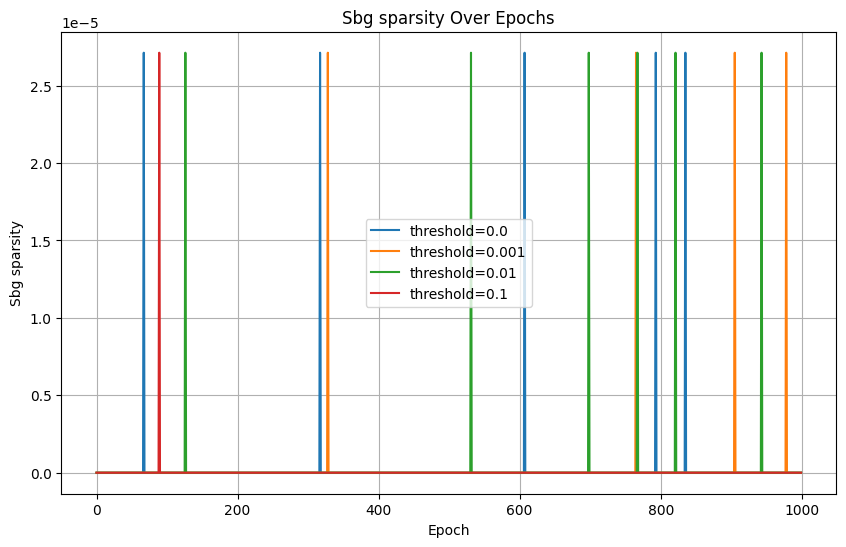

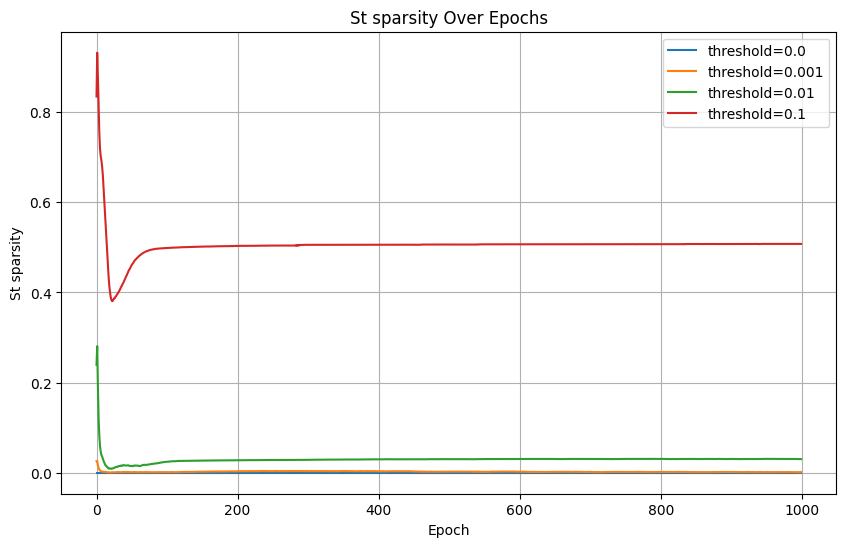

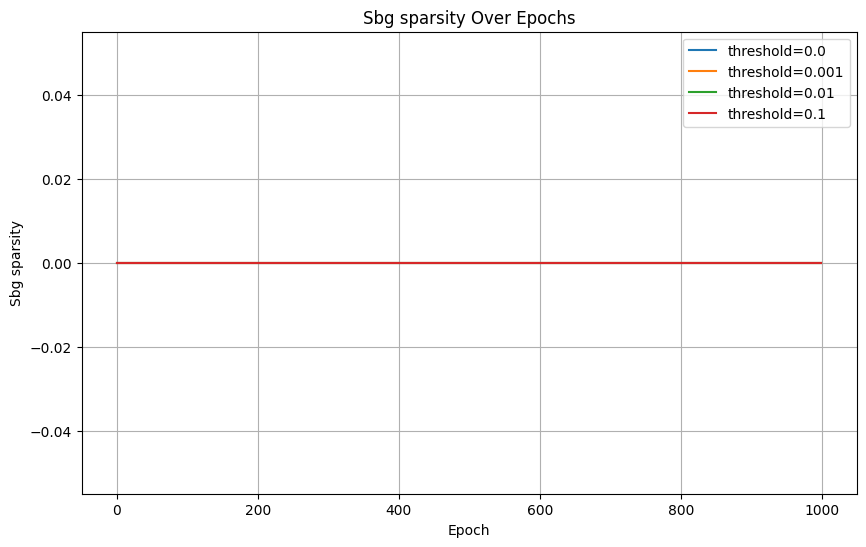

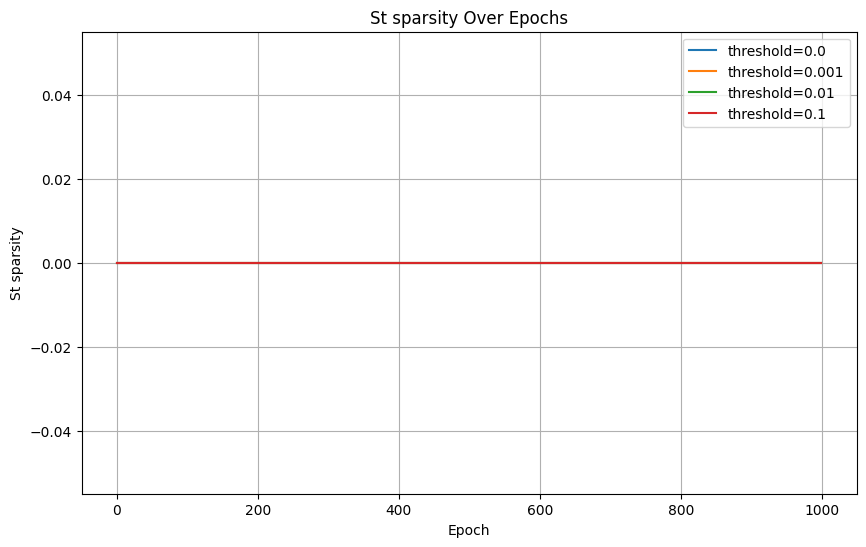

Testing results:
Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0000 (0 of 36864)



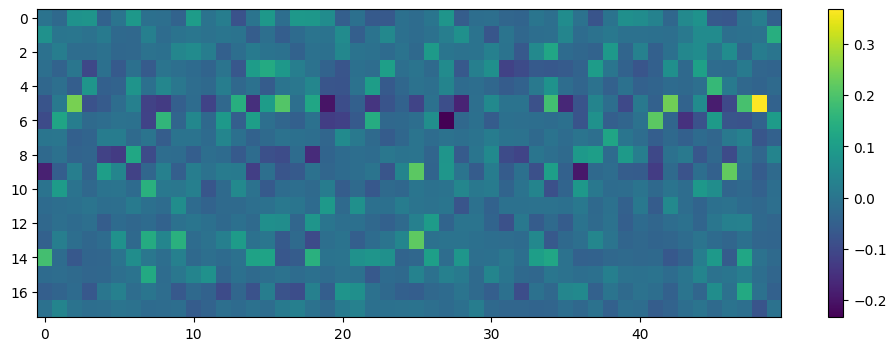

Testing results:
Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.0168 (619 of 36864)



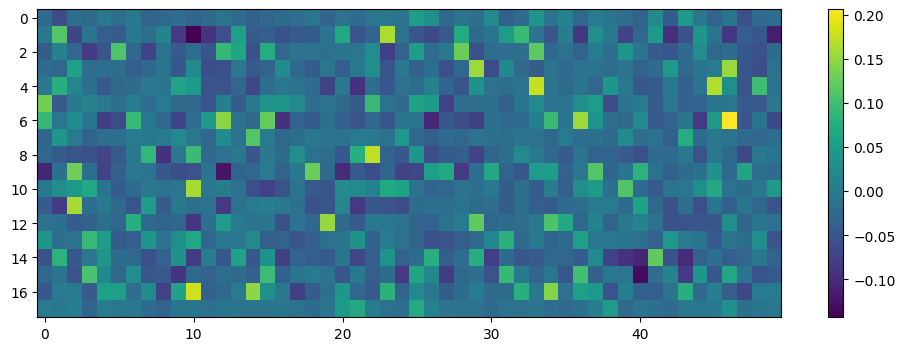

Testing results:
Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.2171 (8004 of 36864)



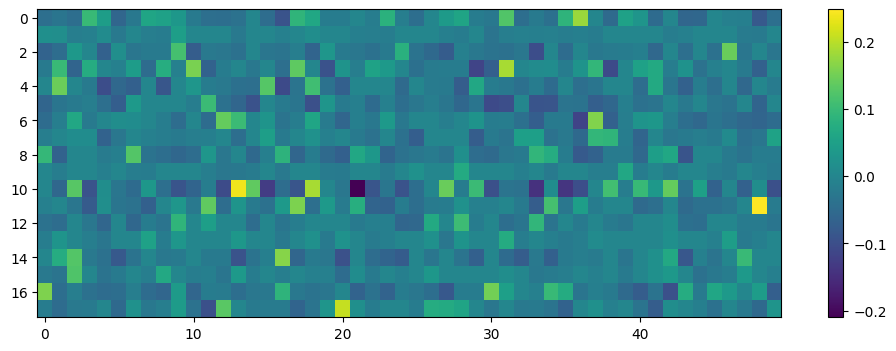

Testing results:
Weight Sparsity: 0.0000 (0 of 37748736), Sbg Sparsity: 0.0000 (0 of 36864), St Sparsity: 0.5077 (18715 of 36864)



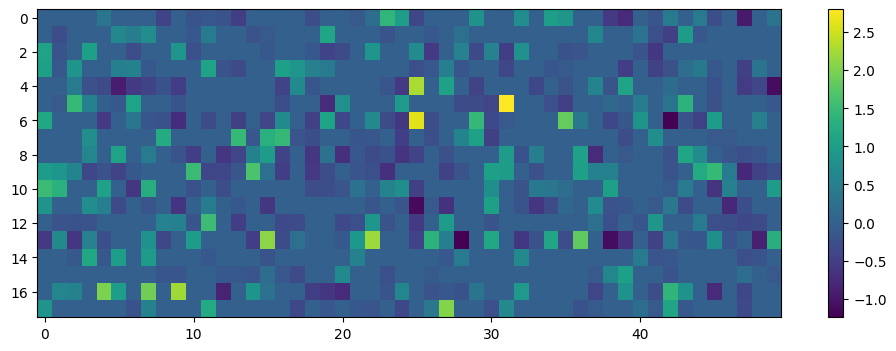

In [ ]:
num_epochs = 1000
learning_rate=0.01

zero_out_bg=False
zero_out_t=True
zero_out_threshold=0.0
zero_out_type='hard'

lasso_sbg_lambda=0.00
lasso_st_lambda=0.00

lasso_weight_lambda=0.00

params_list=[0.0, 0.001, 0.01, 0.1]  # zero_out_threshold

weight_sparsity = {}
sbg_sparsity = {}
st_sparsity = {}
lasso_sbg_losses = {}
lasso_st_losses = {}
lasso_weight_losses = {}
MSE_losses = {}
trained_models = {}


for param in params_list:

    trained_model, trackers, latent_bg_target, latent_t_target = train_model_function(num_epochs=num_epochs, learning_rate=0.01, 
                                                    style_dim=18, latent_dim=512, mlp_norm_type='no_dim',
                                                    zero_out_bg=zero_out_bg, zero_out_t=zero_out_t, zero_out_threshold=param, zero_out_type=zero_out_type, 
                                                    lasso_sbg_lambda=lasso_sbg_lambda, lasso_st_lambda=lasso_st_lambda, lasso_output_type='element', 
                                                    lasso_weight_lambda=lasso_weight_lambda, lasso_weight_type='all', 
                                                    track_weight_threshold=0.0, track_output_threshold=0.0,
                                                    plot_curves=False, device='cuda')
    
    # Store the results and trained model for the current lasso_output_lambda
    weight_sparsity[param] = trackers['weight_sparsity_tracker']
    sbg_sparsity[param] = trackers['sbg_sparsity_tracker']
    st_sparsity[param] = trackers['st_sparsity_tracker']
    lasso_sbg_losses[param] = trackers['lasso_sbg_tracker']
    lasso_st_losses[param] = trackers['lasso_st_tracker']
    lasso_weight_losses[param] = trackers['lasso_weight_tracker']
    MSE_losses[param] = trackers['latent_MSE_tracker']
    trained_models[param] = trained_model

plot_comparison_curves(sbg_sparsity, title = 'Sbg sparsity', label_title='threshold')
plot_comparison_curves(st_sparsity,'St sparsity', label_title='threshold')
plot_comparison_curves(lasso_sbg_losses,'lasso Sbg loss', label_title='threshold')
plot_comparison_curves(lasso_st_losses,'lasso St loss', label_title='threshold')

for param in params_list:
    latent_bg_s, latent_t_s = validate(trained_models[param], latent_bg_target, latent_t_target)
    show_latent_map(latent_t_s, img_idx = 0, show_weight = 50)



In [2]:

for param in params_list:
    latent_bg_s, latent_t_s = validate(trained_models[param], latent_bg_target, latent_t_target)
    show_latent_map(latent_bg_s, img_idx = 0, show_weight = 50)


NameError: name 'params_list' is not defined